<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Siemens_Energy_logo.svg/1920px-Siemens_Energy_logo.svg.png" width = 150 height = 150\
     align = 'left'>

# PGDA ML Training, 2022
## <font color = 'blue'> Case Study 3:</font> <font color = 'orange'>Transportation Study </font>
### <a href=mailto:mohamad-ali.mortada@siemens-energy.com>Ali Mortada</a> and <a href=mailto:travis.vitello@siemens-energy.com>Travis Vitello</a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("commute_time.csv")

In [3]:
df

,cartime,carcost,traintime,traincost,choice
0,70,50,64,39,TRAIN
1,50,230,60,32,TRAIN
2,50,70,58,40,CAR
3,60,108,93,62,CAR
4,70,60,68,26,TRAIN
...,...,...,...,...,...
328,27,50,52,40,CAR
329,25,25,63,80,CAR
330,50,50,80,50,CAR
331,25,25,39,20,CAR


In [4]:
df_x = df[["cartime","carcost","traintime","traincost"]]

In [5]:
df_x["cost_delta"] = df_x.carcost - df_x.traincost
df["cost_delta"] = df.carcost - df.traincost

In [6]:
df_x["time_delta"] = df_x.cartime - df_x.traintime
df["time_delta"] = df.cartime - df.traintime

In [7]:
df_x["car_time_over_50"] = df_x.cartime > 50
df["car_time_over_50"] = df.cartime > 50

In [8]:
df_x["train_time_over_50"] = df_x.traintime > 50
df["train_time_over_50"] = df.traintime > 50

In [9]:
df_x["car_cost_over_100"] = df_x.carcost > 100
df["car_cost_over_100"] = df.carcost > 100

In [10]:
df_x["train_cost_over_50"] = df_x.traincost > 50
df["train_cost_over_50"] = df.traincost > 50

In [11]:
df_x["car_to_train_time"] = df_x.cartime / df_x.traintime
df["car_to_train_time"] = df.cartime / df.traintime

In [12]:
df_x["car_to_train_cost"] = df_x.carcost / df_x.traincost
df["car_to_train_cost"] = df.carcost / df.traincost

In [13]:
df_x.car_time_over_50 = df_x.car_time_over_50.map({True: 1, False: 0})
df_x.train_time_over_50 = df_x.train_time_over_50.map({True: 1, False: 0})
df_x.car_cost_over_100 = df_x.car_cost_over_100.map({True: 1, False: 0})
df_x.train_cost_over_50 = df_x.train_cost_over_50.map({True: 1, False: 0})

df.car_time_over_50 = df.car_time_over_50.map({True: 1, False: 0})
df.train_time_over_50 = df.train_time_over_50.map({True: 1, False: 0})
df.car_cost_over_100 = df.car_cost_over_100.map({True: 1, False: 0})
df.train_cost_over_50 = df.train_cost_over_50.map({True: 1, False: 0})

In [14]:
df_y = df[["choice"]]

In [15]:
df_x

,cartime,carcost,traintime,traincost,cost_delta,time_delta,car_time_over_50,train_time_over_50,car_cost_over_100,train_cost_over_50,car_to_train_time,car_to_train_cost
0,70,50,64,39,11,6,1,1,0,0,1.093750,1.282051
1,50,230,60,32,198,-10,0,1,1,0,0.833333,7.187500
2,50,70,58,40,30,-8,0,1,0,0,0.862069,1.750000
3,60,108,93,62,46,-33,1,1,1,1,0.645161,1.741935
4,70,60,68,26,34,2,1,1,0,0,1.029412,2.307692
...,...,...,...,...,...,...,...,...,...,...,...,...
328,27,50,52,40,10,-25,0,1,0,0,0.519231,1.250000
329,25,25,63,80,-55,-38,0,1,0,1,0.396825,0.312500
330,50,50,80,50,0,-30,0,1,0,0,0.625000,1.000000
331,25,25,39,20,5,-14,0,0,0,0,0.641026,1.250000


In [16]:
df_y

,choice
0,TRAIN
1,TRAIN
2,CAR
3,CAR
4,TRAIN
...,...
328,CAR
329,CAR
330,CAR
331,CAR


In [17]:
df_y.choice = df_y.choice.map({'TRAIN': 1, 'CAR': 0})

# Data Exploration

In [18]:
#!pip install pandas-profiling

In [19]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)

In [1]:
#profile

# Data Prep

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=42)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
y_train.groupby("choice").size()

choice
0    136
1    113
dtype: int64

In [25]:
y_train.groupby("choice").size()[0] / y_train.groupby("choice").size()[1] 

1.2035398230088497

In [26]:
y_test.groupby("choice").size()

choice
0    47
1    37
dtype: int64

In [27]:
y_test.groupby("choice").size()[0] / y_test.groupby("choice").size()[1] 

1.2702702702702702

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [31]:
log_model.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [32]:
lr_score = log_model.score(X_test, y_test)
print('Test accuracy:', accuracy_score(y_test, y_pred = log_model.predict(X_test)))

Test accuracy: 0.7857142857142857


In [33]:
lr_predictions = log_model.predict(X_test)
lr_cm = metrics.confusion_matrix(y_test, lr_predictions)
print(lr_cm)

[[42  5]
 [13 24]]


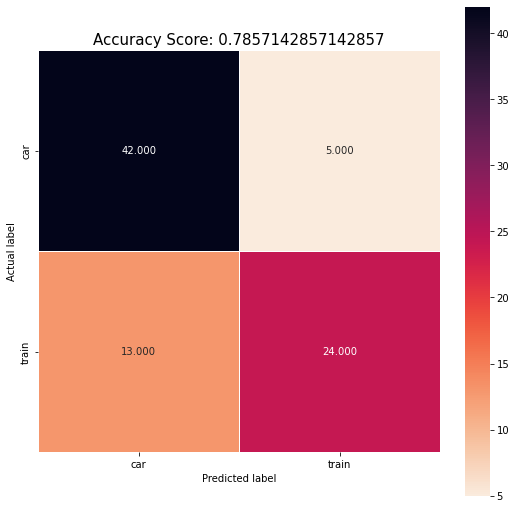

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(lr_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'rocket_r', xticklabels=["car","train"],\
           yticklabels=["car","train"]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lr_score)
plt.title(all_sample_title, size = 15);

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model = KNeighborsClassifier()

In [37]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [38]:
knn_score = knn_model.score(X_test, y_test)
print('Test accuracy:', accuracy_score(y_test, y_pred = knn_model.predict(X_test)))

Test accuracy: 0.7976190476190477


In [39]:
knn_predictions = knn_model.predict(X_test)
knn_cm = metrics.confusion_matrix(y_test, knn_predictions)
print(knn_cm)

[[42  5]
 [12 25]]


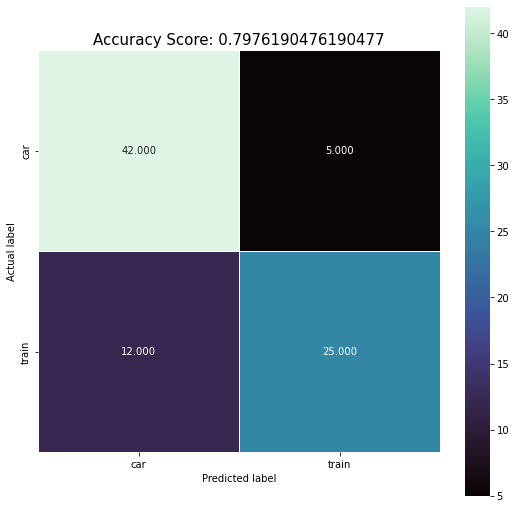

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(knn_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'mako', xticklabels=["car","train"],\
           yticklabels=["car","train"]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_score)
plt.title(all_sample_title, size = 15);

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())
rf_y_pred = rf_model.predict(X_test)
rf_score = rf_model.score(X_test, y_test)
print('Test accuracy score :', accuracy_score(y_test, rf_y_pred))

Test accuracy score : 0.7976190476190477


In [43]:
rf_predictions = rf_model.predict(X_test)
rf_cm = metrics.confusion_matrix(y_test, rf_predictions)
print(rf_cm)

[[43  4]
 [13 24]]


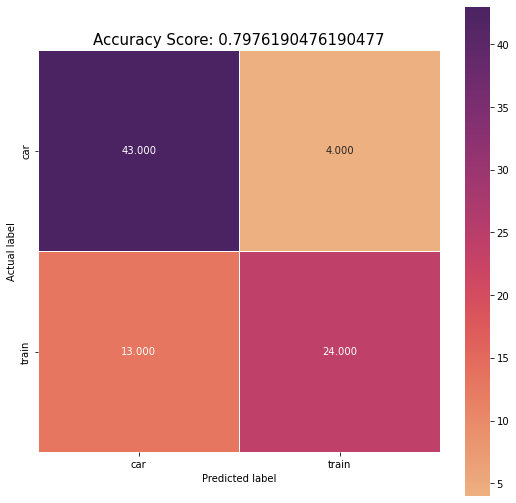

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(rf_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'flare', xticklabels=["car","train"],\
           yticklabels=["car","train"]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf_score)
plt.title(all_sample_title, size = 15);

# XGBoost

In [45]:
from xgboost import XGBClassifier

In [46]:
# Fit XGBClassifier with default parameters 
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Print accuracy, precision and recall scores on test data
xgb_y_pred = xgb_model.predict(X_test)
xgb_score = xgb_model.score(X_test, y_test)
print('Test accuracy: ', accuracy_score(y_test, xgb_y_pred))

Test accuracy:  0.7857142857142857


In [47]:
xbg_predictions = xgb_model.predict(X_test)
xgb_cm = metrics.confusion_matrix(y_test, xbg_predictions)
print(xgb_cm)

[[41  6]
 [12 25]]


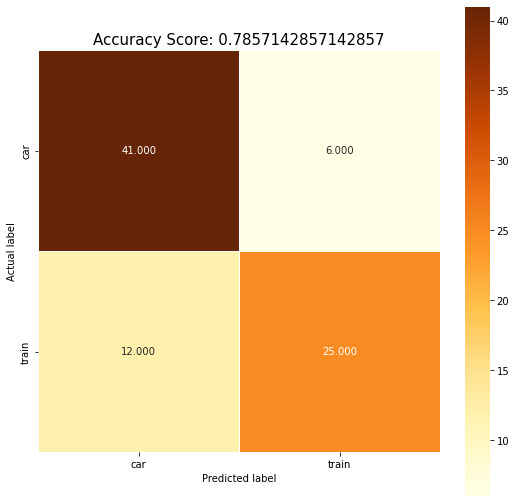

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(xgb_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlOrBr', xticklabels=["car","train"],\
           yticklabels=["car","train"]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(xgb_score)
plt.title(all_sample_title, size = 15);

# Neural Networks

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers

In [51]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [52]:
def build_and_compile_model(norm, loss, optimizer):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'), # Consider sigmoid, since the classificaiton is binary
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss=loss,
                optimizer=optimizer, metrics = ["accuracy"])
    return model

In [53]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [54]:
normalizer.adapt(np.array(X_train))

In [55]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, verbose = 1, \
                                            restore_best_weights = True)

## SGD Optimizer

In [56]:
loss = "binary_crossentropy"
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1, nesterov=True)
model_sgd = build_and_compile_model(normalizer, loss, optimizer)
model_sgd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [57]:
history_sgd = model_sgd.fit(X_train, y_train, epochs=750,callbacks=[callback], steps_per_epoch = 15)

Epoch 1/750
15/15 [==============================] - 1s 4ms/step - loss: 1.8991 - accuracy: 0.6064
Epoch 2/750
15/15 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7871
Epoch 3/750
15/15 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.8032
Epoch 4/750
15/15 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.8193
Epoch 5/750
15/15 [==============================] - 0s 3ms/step - loss: 2.5558 - accuracy: 0.7028
Epoch 6/750
15/15 [==============================] - 0s 4ms/step - loss: 5.9083 - accuracy: 0.5904
Epoch 7/750
15/15 [==============================] - 0s 3ms/step - loss: 7.0001 - accuracy: 0.5462
Epoch 8/750
15/15 [==============================] - 0s 3ms/step - loss: 7.0001 - accuracy: 0.5462
Epoch 9/750
15/15 [==============================] - 0s 3ms/step - loss: 7.0001 - accuracy: 0.5462
Epoch 10/750
15/15 [==============================] - 0s 3ms/step - loss: 7.0001 - accuracy: 0.5462
Epoch 11/

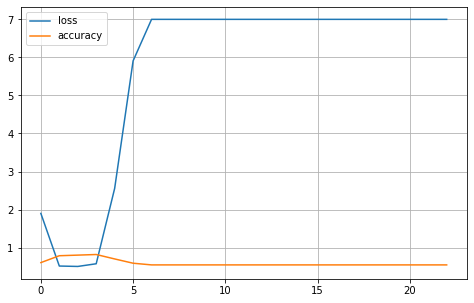

In [58]:
pd.DataFrame(history_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()#.set_ylim(0, 1.5)
plt.show()

In [59]:
X_test_accuracy_sgd = model_sgd.evaluate(X_test, y_test)[1]

3/3 [==============================] - 0s 8ms/step - loss: 0.9456 - accuracy: 0.7976


In [60]:
print("The model accuracy was found to be: " + str(X_test_accuracy_sgd))

The model accuracy was found to be: 0.7976190447807312


## Adam Optimizer

In [61]:
loss = "binary_crossentropy"
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999)
model_adam = build_and_compile_model(normalizer, loss, optimizer)
model_adam.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [62]:
history_adam = model_adam.fit(X_train, y_train, epochs=750,callbacks=[callback],steps_per_epoch = 15)

Epoch 1/750
15/15 [==============================] - 1s 4ms/step - loss: 1.8680 - accuracy: 0.6627
Epoch 2/750
15/15 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.7831
Epoch 3/750
15/15 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.8273
Epoch 4/750
15/15 [==============================] - 0s 6ms/step - loss: 0.5363 - accuracy: 0.8474
Epoch 5/750
15/15 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.8313
Epoch 6/750
15/15 [==============================] - 0s 3ms/step - loss: 0.5096 - accuracy: 0.8474
Epoch 7/750
15/15 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.8554
Epoch 8/750
15/15 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.8594
Epoch 9/750
15/15 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.8514
Epoch 10/750
15/15 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.8514
Epoch 11/

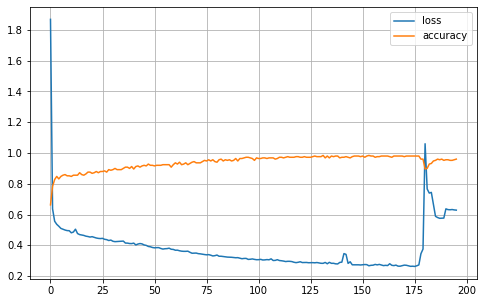

In [63]:
pd.DataFrame(history_adam.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()#.set_ylim(0, 1.5)
plt.show()

In [64]:
X_test_accuracy_adam = model_adam.evaluate(X_test, y_test)[1]

3/3 [==============================] - 0s 4ms/step - loss: 2.8080 - accuracy: 0.7976


In [65]:
print("The model accuracy was found to be: " + str(X_test_accuracy_adam))

The model accuracy was found to be: 0.7976190447807312


## RMSProp Optimizer

In [66]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=.9, momentum=.01)
loss = "binary_crossentropy"
model_rmsprop = build_and_compile_model(normalizer, loss, optimizer)
model_rmsprop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [67]:
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=750,callbacks=[callback],\
                                    steps_per_epoch = 15)

Epoch 1/750
15/15 [==============================] - 1s 3ms/step - loss: 6.5461 - accuracy: 0.5422
Epoch 2/750
15/15 [==============================] - 0s 2ms/step - loss: 3.7164 - accuracy: 0.5944
Epoch 3/750
15/15 [==============================] - 0s 3ms/step - loss: 1.0279 - accuracy: 0.7390
Epoch 4/750
15/15 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7831
Epoch 5/750
15/15 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.7912
Epoch 6/750
15/15 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8032
Epoch 7/750
15/15 [==============================] - 0s 3ms/step - loss: 0.3969 - accuracy: 0.8313
Epoch 8/750
15/15 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.8434
Epoch 9/750
15/15 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8514
Epoch 10/750
15/15 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.8273
Epoch 11/

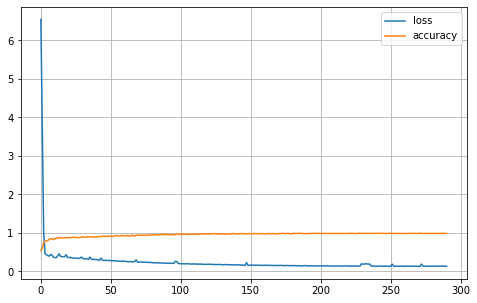

In [68]:
pd.DataFrame(history_rmsprop.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()#.set_ylim(0, 1.5)
plt.show()

In [69]:
X_test_accuracy_rmsprop = model_rmsprop.evaluate(X_test, y_test)[1]

3/3 [==============================] - 0s 8ms/step - loss: 2.7817 - accuracy: 0.8214


In [70]:
print("The model accuracy was found to be: " + str(X_test_accuracy_rmsprop))

The model accuracy was found to be: 0.8214285969734192


# Test Cases

Car = 0; Train = 1

In [71]:
X_test.head(1)

,cartime,carcost,traintime,traincost,cost_delta,time_delta,car_time_over_50,train_time_over_50,car_cost_over_100,train_cost_over_50,car_to_train_time,car_to_train_cost
25,35,56,87,40,16,-52,0,1,0,0,0.402299,1.4


In [72]:
y_test.head(1)

,choice
25,0


In [73]:
model_rmsprop.evaluate(X_test.head(1),y_test.head(1))[1]

1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [74]:
df_x.loc[[10]]

,cartime,carcost,traintime,traincost,cost_delta,time_delta,car_time_over_50,train_time_over_50,car_cost_over_100,train_cost_over_50,car_to_train_time,car_to_train_cost
10,36,30,65,70,-40,-29,0,1,0,1,0.553846,0.428571


In [75]:
df_y.loc[[10]]

,choice
10,0


In [76]:
model_rmsprop.evaluate(df_x.loc[[10]],df_y.loc[[10]])[1]

1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [77]:
df.loc[[10]]

,cartime,carcost,traintime,traincost,choice,cost_delta,time_delta,car_time_over_50,train_time_over_50,car_cost_over_100,train_cost_over_50,car_to_train_time,car_to_train_cost
10,36,30,65,70,CAR,-40,-29,0,1,0,1,0.553846,0.428571


In [78]:
model_rmsprop.evaluate(df_x.loc[[100]],df_y.loc[[100]])[1]

1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [79]:
model_rmsprop.evaluate(df_x.loc[[200]],df_y.loc[[200]])[1]

1/1 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [80]:
model_rmsprop.evaluate(df_x.loc[[300]],df_y.loc[[300]])[1]

1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [81]:
model_rmsprop.evaluate(df_x.loc[[111]],df_y.loc[[111]])[1]

1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [82]:
model_rmsprop.evaluate(df_x.loc[[75]],df_y.loc[[75]])[1]

1/1 [==============================] - 0s 30ms/step - loss: 0.1808 - accuracy: 1.0000


1.0

In [83]:
df_x.loc[[75]]

,cartime,carcost,traintime,traincost,cost_delta,time_delta,car_time_over_50,train_time_over_50,car_cost_over_100,train_cost_over_50,car_to_train_time,car_to_train_cost
75,25,50,40,17,33,-15,0,0,0,0,0.625,2.941176


In [84]:
df_y.loc[[75]]

,choice
75,0


In [85]:
model_rmsprop.evaluate(df_x.loc[[195]],df_y.loc[[195]])[1]

1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [86]:
y_test_index_list = y_test.index.values.tolist()

In [87]:
y_test = y_test.reset_index()

In [88]:
y_test["Predictions"] = pd.DataFrame(np.where(model_rmsprop.predict(X_test) > .5, 1,0))[0]

3/3 [==============================] - 0s 3ms/step


In [89]:
y_test = y_test.set_index("index")

In [90]:
X_test = X_test.reset_index()
X_test = X_test.set_index("index")

In [91]:
ML_preds_df = pd.concat([X_test, y_test], axis=1)

In [92]:
ML_preds_df.choice = ML_preds_df.choice.map({ 1:"TRAIN",  0: "CAR" })
ML_preds_df.Predictions = ML_preds_df.Predictions.map({ 1:"TRAIN",  0: "CAR" })

In [93]:
ML_preds_df = ML_preds_df.rename({"choice":"Actual","Predictions":"Predicted"},axis = 1)

In [94]:
correct_list = [0] * len(ML_preds_df)
for i in range(len(ML_preds_df.reset_index())):
    if ML_preds_df.reset_index().Actual[i] == ML_preds_df.reset_index().Predicted[i]:
        correct_list[i] = 1
    else:
        correct_list[i] = 0

In [95]:
ML_preds_df = ML_preds_df.reset_index()
ML_preds_df["Correct"] = correct_list
ML_preds_df = ML_preds_df.set_index("index")

In [96]:
ML_preds_df.to_excel("Case_3_Best_ML_model_result.xlsx")

# <font color = red>Conclusion </font>

It appears that neural net models returned a model accuracies of >= 79% given the parameters and data specified in this test study.  These results were the highest of that observed in all ML models considered herein.  Further investigation would likely involve adjusting various hyperparameters defining these such models (or others not explored in this study), such as by a grid search approach, to see if predictive improvements may be possible on this data set.